In [1]:
    import numpy as np
    import pandas as pd
    import matplotlib.pyplot as plt
    import seaborn as sns
    from sklearn import metrics
    from sklearn.model_selection import train_test_split
    from sklearn.preprocessing import LabelEncoder
    from sklearn import metrics
    from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
    from sklearn.svm import SVR
    from sklearn.tree import DecisionTreeRegressor
    from sklearn.ensemble import RandomForestRegressor
    from sklearn import neighbors
    from math import sqrt

In [2]:
pd.set_option('display.max_columns', None)  # or 1000
pd.set_option('display.max_rows', None)  # or 1000
pd.set_option('display.max_colwidth', None)  # or 199

In [3]:
hs_train=pd.read_csv('train.csv')
hs_test=pd.read_csv('test.csv') # not now 

## *------------*
## Train Data
## *------------*

In [4]:
hs_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
hs_train.shape

(1460, 81)

In [6]:
hs_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [7]:
hs_train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [8]:
hs_train.isnull().sum().sum()

6965

In [9]:
hs_train.isnull().sum().sort_values(ascending= False)

PoolQC           1453
MiscFeature      1406
Alley            1369
Fence            1179
FireplaceQu       690
LotFrontage       259
GarageYrBlt        81
GarageCond         81
GarageType         81
GarageFinish       81
GarageQual         81
BsmtFinType2       38
BsmtExposure       38
BsmtQual           37
BsmtCond           37
BsmtFinType1       37
MasVnrArea          8
MasVnrType          8
Electrical          1
Id                  0
Functional          0
Fireplaces          0
KitchenQual         0
KitchenAbvGr        0
BedroomAbvGr        0
HalfBath            0
FullBath            0
BsmtHalfBath        0
TotRmsAbvGrd        0
GarageCars          0
GrLivArea           0
GarageArea          0
PavedDrive          0
WoodDeckSF          0
OpenPorchSF         0
EnclosedPorch       0
3SsnPorch           0
ScreenPorch         0
PoolArea            0
MiscVal             0
MoSold              0
YrSold              0
SaleType            0
SaleCondition       0
BsmtFullBath        0
HeatingQC 

In [10]:
#fill null values with mean,median ,mode
for i in hs_train.columns:
    if hs_train[i].dtypes == 'object':
        hs_train[i].fillna(hs_train[i].mode()[0], inplace=True)
    else:
        hs_train[i].fillna(hs_train[i].median(), inplace=True)
#print(housedf)
hs_train.sample(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1450,1451,90,RL,60.0,9000,Pave,Grvl,Reg,Lvl,AllPub,FR2,Gtl,NAmes,Norm,Norm,Duplex,2Story,5,5,1974,1974,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,Gd,TA,No,Unf,0,Unf,0,896,896,GasA,TA,Y,SBrkr,896,896,0,1792,0,0,2,2,4,2,TA,8,Typ,0,Gd,Attchd,1980.0,Unf,0,0,TA,TA,Y,32,45,0,0,0,0,Gd,MnPrv,Shed,0,9,2009,WD,Normal,136000
1020,1021,20,RL,60.0,7024,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,1Fam,1Story,4,5,2005,2005,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,1024,Unf,0,108,1132,GasA,Ex,Y,SBrkr,1132,0,0,1132,1,0,1,1,2,1,Gd,5,Typ,0,Gd,Attchd,2005.0,Fin,2,451,TA,TA,Y,252,64,0,0,0,0,Gd,MnPrv,Shed,0,6,2008,WD,Normal,176000
894,895,90,RL,64.0,7018,Pave,Grvl,Reg,Bnk,AllPub,Inside,Gtl,SawyerW,Norm,Norm,Duplex,1Story,5,5,1979,1979,Gable,CompShg,Plywood,Plywood,None,0.0,TA,TA,Slab,TA,TA,No,Unf,0,Unf,0,0,0,GasA,TA,Y,SBrkr,1535,0,0,1535,0,0,2,0,4,2,TA,8,Typ,0,Gd,Attchd,1979.0,Unf,2,400,TA,TA,Y,0,0,0,0,0,0,Gd,MnPrv,Shed,0,6,2009,WD,Alloca,118858
508,509,70,RM,60.0,9600,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Norm,Norm,1Fam,2Story,7,9,1928,2005,Gambrel,CompShg,MetalSd,MetalSd,None,0.0,TA,Ex,BrkTil,TA,TA,No,Rec,141,Unf,0,548,689,GasA,Ex,Y,SBrkr,689,689,0,1378,0,0,2,0,3,1,Gd,7,Typ,1,Gd,Detchd,1928.0,Unf,2,360,TA,TA,N,0,0,116,0,0,0,Gd,MnPrv,Shed,0,10,2008,WD,Normal,161000
690,691,120,RM,69.0,4426,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,TwnhsE,1Story,6,5,2004,2004,Gable,CompShg,VinylSd,VinylSd,BrkFace,147.0,Gd,TA,PConc,Gd,TA,Gd,GLQ,697,Unf,0,151,848,GasA,Ex,Y,SBrkr,848,0,0,848,1,0,1,0,1,1,Gd,3,Typ,1,TA,Attchd,2004.0,RFn,2,420,TA,TA,Y,149,0,0,0,0,0,Gd,MnPrv,Shed,0,5,2008,WD,Normal,141000
466,467,20,RL,85.0,10628,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,7,5,1970,1970,Flat,Tar&Grv,Plywood,Plywood,None,0.0,TA,Gd,CBlock,TA,Gd,Gd,GLQ,778,Unf,0,499,1277,GasA,TA,Y,SBrkr,1277,0,0,1277,1,0,1,0,2,1,TA,5,Typ,1,Po,Attchd,1970.0,Unf,2,526,TA,TA,Y,0,0,0,0,176,0,Gd,GdWo,Shed,0,4,2007,WD,Normal,167000
891,892,60,RL,70.0,11184,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,Sawyer,Norm,Norm,1Fam,2Story,6,5,1978,1978,Hip,CompShg,HdBoard,HdBoard,BrkFace,92.0,TA,TA,CBlock,TA,TA,No,LwQ,226,Rec,500,192,918,GasA,Gd,Y,SBrkr,918,765,0,1683,0,0,2,1,3,1,TA,7,Typ,1,TA,Attchd,1978.0,RFn,2,440,TA,TA,Y,243,0,0,0,0,0,Gd,MnPrv,Shed,0,7,2009,WD,Normal,172500
1333,1334,50,RM,60.0,7200,Pave,Grvl,Reg,Lvl,AllPub,Corner,Gtl,IDOTRR,Norm,Norm,1Fam,1.5Fin,5,6,1938,1995,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,TA,TA,CBlock,TA,TA,No,Unf,0,Unf,0,803,803,GasA,Ex,Y,SBrkr,803,557,0,1360,0,0,1,1,2,1,Gd,6,Typ,0,Gd,Detchd,1951.0,Unf,1,297,TA,TA,Y,0,65,190,0,0,0,Gd,MnPrv,Shed,0,7,2006,WD,Normal,125500
1190,1191,190,RL,69.0,32463,Pave,Grvl,Reg,Low,AllPub,Inside,Mod,Mitchel,Norm,Norm,2fmCon,1Story,4,4,1961,1975,Gable,CompShg,MetalSd,MetalSd,Stone,149.0,TA,Gd,CBlock,TA,TA,Av,BLQ,1159,Unf,0,90,1249,GasA,Ex,Y,SBrkr,1622,0,0,1622,1,0,1,0,3,1,TA,7,Typ,1,TA,2Types,1975.0,Fin,4,1356,TA,TA,Y,439,0,0,0,0,0,Gd,MnPrv,Shed,0,3,2007,WD,Normal,168000
262,263,80,RL,88.0,8471,Pave,Grvl,IR1,Lvl,AllPub,Corner,Gtl,Sawyer,Norm,Norm,1Fam,SLvl,6,7,1977,1995,Gable,CompShg,HdBoard,Plywood,BrkFace,46.0,TA,TA,CBlock,Gd,Gd,Av,A

In [11]:
#fill null values with mean,median ,mode
for i in hs_train.columns:
    if hs_train[i].dtypes == 'object':
        hs_train[i].fillna(hs_train[i].mode()[0], inplace=True)
    else:
       hs_train[i].fillna(hs_train[i].median(), inplace=True)
#print(housedf)
hs_train.sample(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
339,340,20,RL,66.0,12400,Pave,Grvl,IR1,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,6,7,1958,1998,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,176.0,TA,TA,CBlock,TA,Fa,No,Rec,585,Unf,0,630,1215,GasA,TA,Y,FuseA,1215,0,0,1215,0,0,1,0,3,1,TA,6,Typ,0,Gd,Attchd,1958.0,Unf,1,297,TA,TA,Y,0,0,0,0,234,0,Gd,MnPrv,Shed,0,6,2009,WD,Normal,155000
1012,1013,70,RL,55.0,10592,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,6,7,1923,1996,Hip,CompShg,Wd Sdng,Wd Sdng,None,0.0,TA,Gd,PConc,TA,Fa,No,Unf,0,Unf,0,602,602,GasA,TA,Y,SBrkr,900,602,0,1502,0,0,1,1,3,1,Gd,7,Typ,2,TA,Detchd,1923.0,Unf,1,180,TA,TA,Y,96,0,112,0,53,0,Gd,MnPrv,Shed,0,8,2007,WD,Normal,165000
628,629,60,RL,70.0,11606,Pave,Grvl,IR1,HLS,AllPub,Inside,Sev,NAmes,Norm,Norm,1Fam,2Story,5,5,1969,1969,Gable,CompShg,Plywood,Plywood,BrkFace,192.0,TA,TA,PConc,Gd,TA,Av,Rec,650,Unf,0,390,1040,GasA,TA,Y,SBrkr,1040,1040,0,2080,0,1,1,2,5,1,Fa,9,Typ,2,TA,Attchd,1969.0,Unf,2,504,TA,TA,Y,335,0,0,0,0,0,Gd,MnPrv,Shed,0,9,2007,WD,Family,135000
763,764,60,RL,82.0,9430,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,1999,1999,Gable,CompShg,VinylSd,VinylSd,BrkFace,673.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,1163,Unf,0,89,1252,GasA,Ex,Y,SBrkr,1268,1097,0,2365,1,0,2,1,3,1,Gd,8,Typ,1,Gd,Attchd,1999.0,RFn,3,856,TA,TA,Y,0,128,0,0,180,0,Gd,MnPrv,Shed,0,7,2009,WD,Normal,337000
437,438,45,RM,50.0,6000,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,BrkSide,Norm,Norm,1Fam,1.5Unf,6,7,1926,2004,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,Gd,TA,PConc,TA,TA,No,Unf,0,Unf,0,884,884,GasA,Gd,Y,SBrkr,904,0,0,904,0,0,1,0,2,1,TA,4,Typ,0,Gd,Detchd,1926.0,Unf,1,180,TA,TA,Y,0,0,105,0,0,0,Gd,MnPrv,Shed,0,1,2009,WD,Normal,119000
734,735,20,RL,69.0,8978,Pave,Grvl,IR1,Lvl,AllPub,Corner,Gtl,Sawyer,Norm,Norm,1Fam,1Story,5,5,1968,1968,Gable,CompShg,Plywood,Plywood,None,0.0,TA,TA,PConc,TA,TA,No,Unf,0,Unf,0,948,948,GasA,TA,Y,SBrkr,948,0,0,948,0,0,1,0,3,1,TA,6,Typ,0,Gd,Attchd,1968.0,Unf,1,300,TA,TA,Y,147,0,0,0,0,0,Gd,MnPrv,Shed,0,5,2007,WD,Family,108000
1400,1401,50,RM,50.0,6000,Pave,Grvl,Reg,Lvl,AllPub,Corner,Gtl,BrkSide,Norm,Norm,1Fam,1.5Fin,6,7,1929,1950,Gable,CompShg,WdShing,Wd Shng,None,0.0,TA,TA,BrkTil,TA,TA,No,Unf,0,Unf,0,862,862,GasA,TA,Y,SBrkr,950,208,0,1158,0,0,1,0,3,1,TA,5,Typ,1,Gd,BuiltIn,1929.0,RFn,1,208,TA,TA,Y,0,0,112,0,0,0,Gd,MnPrv,Shed,0,7,2008,WD,Normal,120000
1119,1120,20,RL,70.0,7560,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,5,1959,1959,Gable,CompShg,BrkFace,Wd Sdng,None,0.0,TA,TA,CBlock,TA,TA,No,LwQ,369,Unf,0,671,1040,GasA,TA,Y,FuseA,1040,0,0,1040,0,0,1,0,3,1,TA,6,Typ,0,Gd,Attchd,1959.0,RFn,1,286,TA,TA,Y,140,0,252,0,0,0,Gd,GdWo,Shed,0,7,2006,WD,Normal,133700
405,406,20,RL,69.0,9991,Pave,Grvl,IR1,Lvl,AllPub,Corner,Gtl,Sawyer,Feedr,Norm,1Fam,1Story,4,4,1976,1993,Gable,CompShg,Plywood,Plywood,None,0.0,TA,TA,CBlock,TA,TA,No,BLQ,1116,Unf,0,165,1281,GasA,Ex,Y,SBrkr,1620,0,0,1620,1,0,2,0,3,1,TA,8,Min1,1,TA,Attchd,1993.0,Unf,2,490,TA,TA,Y,120,78,0,0,0,0,Gd,GdWo,Shed,0,6,2009,WD,Normal,150000
742,743,20,RL,65.0,8450,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,SawyerW,Norm,Norm,1Fam,1Story,7,5,2000,2001,Gable,CompShg,VinylSd,VinylSd,BrkFace,108.0,TA,TA,PConc,Gd,TA

In [12]:
hs_train.isnull().sum().sort_values(ascending=False)

Id               0
CentralAir       0
GarageYrBlt      0
GarageType       0
FireplaceQu      0
Fireplaces       0
Functional       0
TotRmsAbvGrd     0
KitchenQual      0
KitchenAbvGr     0
BedroomAbvGr     0
HalfBath         0
FullBath         0
BsmtHalfBath     0
BsmtFullBath     0
GrLivArea        0
LowQualFinSF     0
2ndFlrSF         0
1stFlrSF         0
GarageFinish     0
GarageCars       0
GarageArea       0
PoolQC           0
SaleCondition    0
SaleType         0
YrSold           0
MoSold           0
MiscVal          0
MiscFeature      0
Fence            0
PoolArea         0
GarageQual       0
ScreenPorch      0
3SsnPorch        0
EnclosedPorch    0
OpenPorchSF      0
WoodDeckSF       0
PavedDrive       0
GarageCond       0
Electrical       0
HeatingQC        0
MSSubClass       0
Heating          0
OverallCond      0
OverallQual      0
HouseStyle       0
BldgType         0
Condition2       0
Condition1       0
Neighborhood     0
LandSlope        0
LotConfig        0
Utilities   

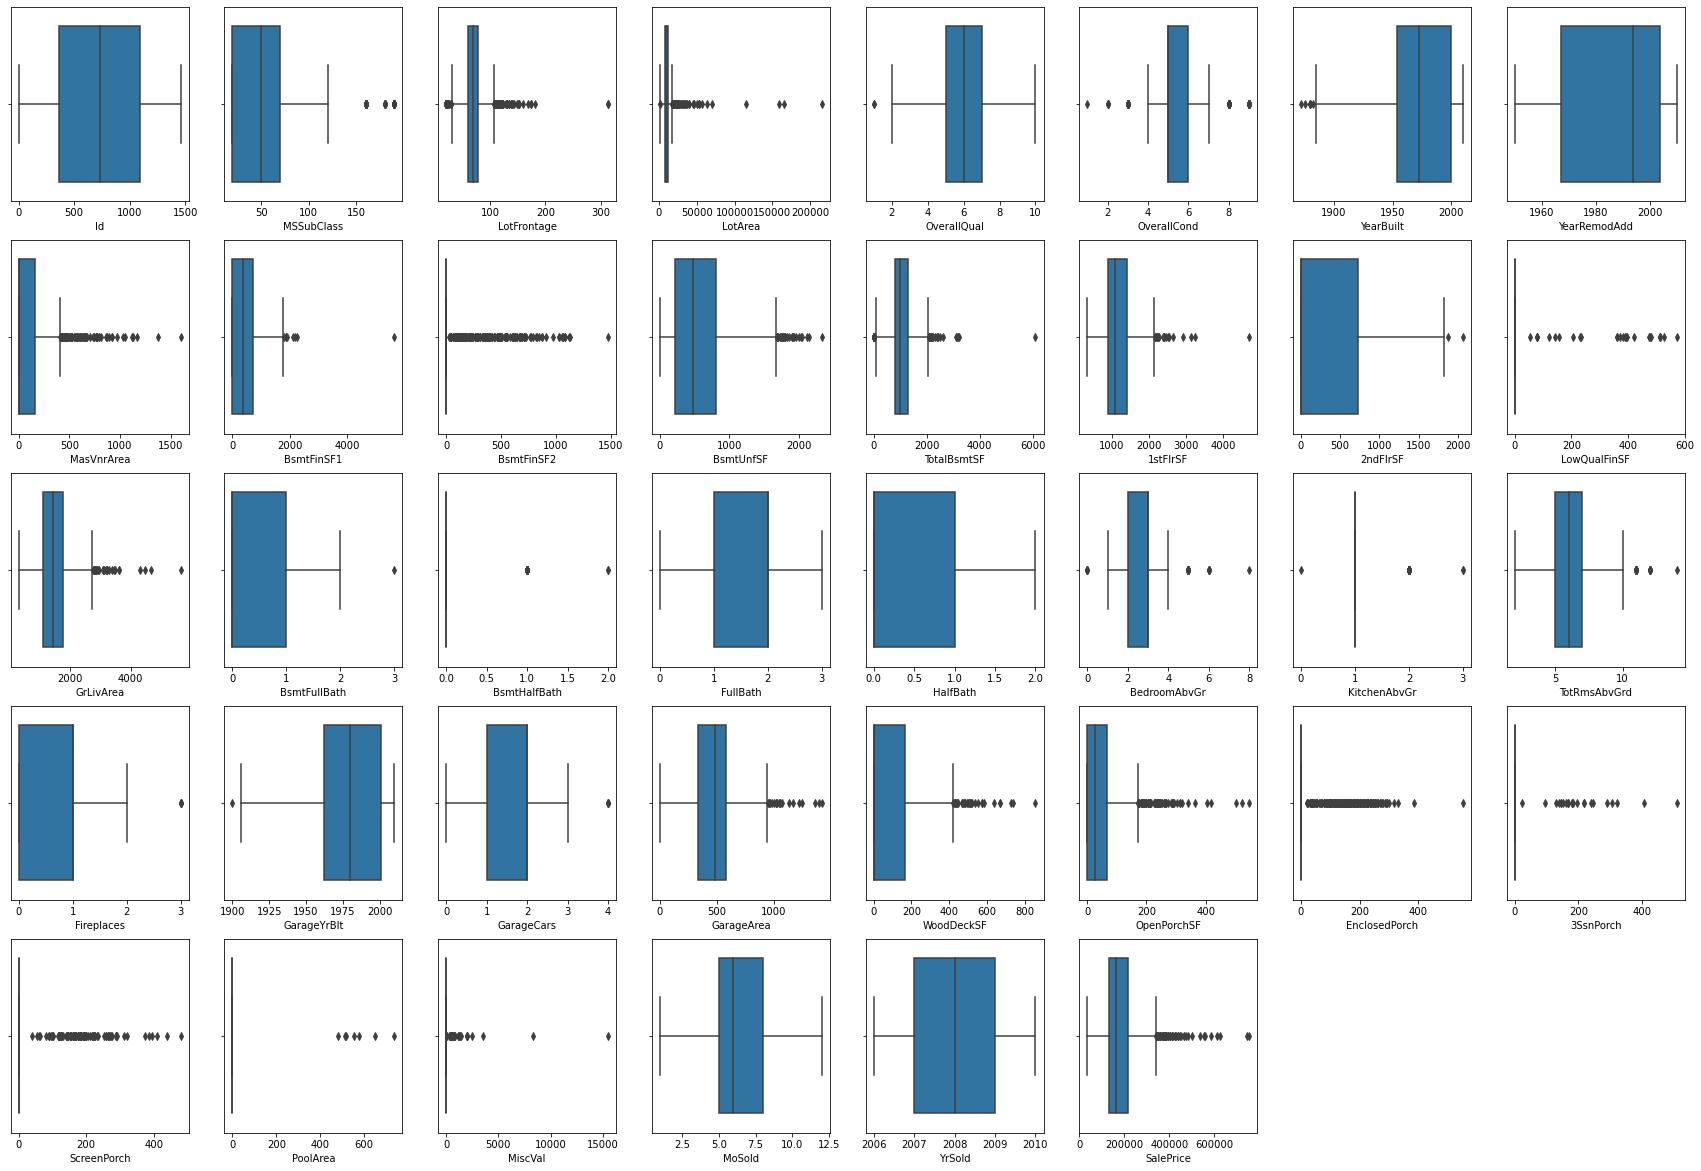

In [13]:
count=1
plt.subplots(figsize=(30,25))
for i in hs_train.columns:
    if hs_train[i].dtypes!='object':
        plt.subplot(6,8,count)
        sns.boxplot(x=hs_train[i])
        count+=1

plt.show()

In [14]:
# treatment of outlier-> 1.5 times the IQR 
# treat outlier as null
#<pre>
def out_to_null(data=hs_train):
    for x in hs_train.columns:
        if hs_train[x].dtypes ==np.float64:
            #In the given column the outliers will convert into null values
            print('\n\n Column name:', x)
            q1=data[x].quantile(0.25)
            print('Quatile, Q1: ',q1)
            q3=data[x].quantile(0.75)
            print('Quatile, Q3: ',q3)
            iqr=q3-q1
            print('Inter Quatile Range, IQR: ',iqr)
            ulp=q3+(1.5*iqr)
            print('Upper Limit Point, ULP: ',ulp)
            llp=q1-(1.5*iqr)
            print('Lower Limit Point, LLP: ',llp)
            print(np.where(ulp))
            #here the values which are above upperlimit and below lowerlimt are replaced with null values          
            data[x]=np.where(data[x] > ulp,np.nan,
                                   np.where(data[x] < llp,np.nan ,data[x]))
            print('\n\nin the given column the outliers are replaced with null values\n')

In [15]:
out_to_null(hs_train)



 Column name: LotFrontage
Quatile, Q1:  60.0
Quatile, Q3:  79.0
Inter Quatile Range, IQR:  19.0
Upper Limit Point, ULP:  107.5
Lower Limit Point, LLP:  31.5
(array([0]),)


in the given column the outliers are replaced with null values



 Column name: MasVnrArea
Quatile, Q1:  0.0
Quatile, Q3:  164.25
Inter Quatile Range, IQR:  164.25
Upper Limit Point, ULP:  410.625
Lower Limit Point, LLP:  -246.375
(array([0]),)


in the given column the outliers are replaced with null values



 Column name: GarageYrBlt
Quatile, Q1:  1962.0
Quatile, Q3:  2001.0
Inter Quatile Range, IQR:  39.0
Upper Limit Point, ULP:  2059.5
Lower Limit Point, LLP:  1903.5
(array([0]),)


in the given column the outliers are replaced with null values



In [16]:
hs_train.isnull().sum().sum()

205

In [17]:
#fill null values with mean,median ,mode
for i in hs_train.columns:
    if hs_train[i].dtypes == 'object':
        hs_train[i].fillna(hs_train[i].mode()[0], inplace=True)
    else:
       hs_train[i].fillna(hs_train[i].median(), inplace=True)
#print(housedf)
hs_train.sample(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1171,1172,20,RL,76.0,9120,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,TA,TA,No,ALQ,662,Unf,0,599,1261,GasA,Ex,Y,SBrkr,1261,0,0,1261,1,0,1,0,3,1,TA,6,Typ,1,TA,Attchd,1958.0,RFn,2,433,TA,TA,Y,0,0,0,0,288,0,Gd,MnPrv,Shed,1400,11,2008,WD,Normal,163000
261,262,60,RL,69.0,9588,Pave,Grvl,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,8,5,2007,2007,Gable,CompShg,CemntBd,CmentBd,Stone,270.0,Gd,TA,PConc,Ex,TA,No,Unf,0,Unf,0,1482,1482,GasA,Ex,Y,SBrkr,1482,1092,0,2574,0,0,2,1,3,1,Ex,10,Typ,1,Gd,BuiltIn,2007.0,Fin,3,868,TA,TA,Y,0,148,0,0,0,0,Gd,MnPrv,Shed,0,11,2007,New,Partial,276000
1110,1111,60,RL,69.0,8000,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,1995,1996,Gable,CompShg,HdBoard,HdBoard,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,219,Unf,0,554,773,GasA,Gd,Y,SBrkr,773,885,0,1658,1,0,2,1,3,1,TA,8,Typ,1,TA,Attchd,1995.0,Fin,2,431,TA,TA,Y,224,84,0,0,0,0,Gd,MnPrv,Shed,0,6,2008,WD,Normal,188000
1140,1141,20,RL,60.0,7350,Pave,Grvl,Reg,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,7,1951,1951,Gable,CompShg,HdBoard,HdBoard,None,0.0,TA,TA,CBlock,TA,TA,Mn,ALQ,852,Unf,0,100,952,GasA,TA,Y,SBrkr,952,0,0,952,1,0,1,0,2,1,TA,4,Typ,0,Gd,Detchd,1988.0,Unf,2,840,TA,TA,Y,0,0,0,0,0,0,Gd,MnPrv,Shed,0,6,2008,COD,Abnorml,139000
430,431,160,RM,69.0,1680,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,BrDale,Norm,Norm,Twnhs,2Story,6,5,1971,1971,Gable,CompShg,HdBoard,HdBoard,BrkFace,232.0,TA,TA,CBlock,TA,TA,No,ALQ,387,Unf,0,96,483,GasA,TA,Y,SBrkr,483,504,0,987,0,0,1,1,2,1,TA,4,Typ,0,Gd,Detchd,1971.0,Unf,1,264,TA,TA,Y,0,0,0,0,0,0,Gd,MnPrv,Shed,0,7,2008,COD,Abnorml,85400
1193,1194,120,RM,69.0,4500,Pave,Grvl,Reg,Lvl,AllPub,FR2,Gtl,Mitchel,Norm,Norm,TwnhsE,1Story,6,5,1999,1999,Hip,CompShg,VinylSd,VinylSd,BrkFace,0.0,TA,TA,PConc,Ex,TA,No,GLQ,883,Unf,0,341,1224,GasA,Ex,Y,SBrkr,1224,0,0,1224,1,0,2,0,2,1,TA,5,Typ,0,Gd,Attchd,1999.0,Fin,2,402,TA,TA,Y,0,304,0,0,0,0,Gd,MnPrv,Shed,0,6,2009,WD,Normal,165000
1340,1341,20,RL,70.0,8294,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,4,5,1971,1971,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,TA,TA,No,Unf,0,Unf,0,858,858,GasA,TA,Y,SBrkr,872,0,0,872,0,0,1,0,3,1,TA,5,Typ,0,Gd,Detchd,1974.0,Unf,4,480,TA,TA,Y,0,0,0,0,0,0,Gd,GdWo,Shed,0,6,2007,WD,Normal,123000
87,88,160,FV,40.0,3951,Pave,Pave,Reg,Lvl,AllPub,Corner,Gtl,Somerst,Norm,Norm,TwnhsE,2Story,6,5,2009,2009,Gable,CompShg,VinylSd,VinylSd,Stone,76.0,Gd,TA,PConc,Gd,TA,Av,Unf,0,Unf,0,612,612,GasA,Ex,Y,SBrkr,612,612,0,1224,0,0,2,1,2,1,Gd,4,Typ,0,Gd,Detchd,2009.0,RFn,2,528,TA,TA,Y,0,234,0,0,0,0,Gd,MnPrv,Shed,0,6,2009,New,Partial,164500
916,917,20,C (all),50.0,9000,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,IDOTRR,Norm,Norm,1Fam,1Story,2,3,1949,1950,Gable,CompShg,AsbShng,AsbShng,None,0.0,TA,TA,CBlock,TA,TA,Av,BLQ,50,Unf,0,430,480,GasA,TA,N,FuseA,480,0,0,480,1,0,0,0,1,1,TA,4,Typ,0,Gd,Detchd,1958.0,Unf,1,308,TA,TA,Y,0,0,0,0,0,0,Gd,MnPrv,Shed,0,10,2006,WD,Abnorml,35311
177,178,50,RL,69.0,13650,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,Sawyer,Norm,Norm,1Fam,1.5Fin,5,5,1958,1958,Gable,CompShg,MetalSd,MetalSd,None,0.0,Gd,Gd,CBlock,TA,TA,No,A

In [18]:
hs_train.isnull().sum().sum()

0

In [19]:
hs_train = pd.get_dummies(hs_train, drop_first = True)
hs_train.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,Alley_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_NoSeWa,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_TA,BsmtCond_Gd,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_Y,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_Po,FireplaceQu_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Fa,GarageQual_Gd,GarageQual_Po,GarageQual_TA,GarageCond_Fa,GarageCond_Gd,GarageCond_Po,GarageCond_TA,PavedDrive_P,PavedDrive_Y,PoolQC_Fa,PoolQC_Gd,Fence_GdWo,Fence_MnPrv,Fence_MnWw,MiscFeature_Othr,MiscFeature_Shed,MiscFeature_TenC,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2003.0,2,548,0,61,0,0,0,0,0,2,2008,208500,0,0,1,0,1,0,0,0,1,

In [20]:
hs_train.shape

(1460, 247)

In [31]:
from sklearn.model_selection import train_test_split

train_df, val_df = train_test_split(hs_train, test_size=0.2, random_state=42)

X = train_df.drop(columns=['Id','SalePrice'])
y = train_df['SalePrice']

X_val = val_df.drop(columns=['Id','SalePrice'])
y_val = val_df['SalePrice']

In [32]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25, random_state=42)
# 0.20 menas testing data is 20 % and 80 % training
# random satate for to select data randomly into training and testing part

In [33]:
print(X_train.shape)
print(y_train.shape)

(876, 245)
(876,)


In [34]:
print(X_test.shape)
print(y_test.shape)

(292, 245)
(292,)


In [35]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

model = LinearRegression()
model.fit(X_train, y_train)

pred_val= model.predict(X_val)
print("RMSE is :", mean_squared_error(y_val, pred_val, squared=False))

RMSE is : 44684.13651176301


In [37]:
!pip install xgboost

In [39]:
from xgboost import XGBRegressor


# Define  model as an object of XGBRegressor
model_XGboost = XGBRegressor(n_estimators=350,max_depth=15,learning_rate=.1,random_state=1,
                     n_jobs=10, subsample=1,min_child_weight=0.6) # Your code here

# Fit the model
model_XGboost.fit(X_train, y_train)

# Get validation predictions using RMSE
pred_val_xgboost = model_XGboost.predict(X_val)
print("XG Booster's RMSE is :", mean_squared_error(y_val, pred_val_xgboost, squared=False))

/opt/anaconda3/lib/python3.9/site-packages/xgboost/compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


XG Booster's RMSE is : 31134.869775905543


In [40]:
from sklearn.ensemble import RandomForestRegressor

model=RandomForestRegressor(min_samples_split=3, n_estimators=50, warm_start=True)

model.fit(X_train,y_train)

prediction=model.predict(X_val)
print("Random Regressor's RMSE is:", mean_squared_error(y_val, prediction,squared=False))

Random Regressor's RMSE is: 30910.209776981435


In [41]:
hs_train.to_csv('train_fnl', index= False)

## *------------*
## Test Data
## *------------*

In [42]:
hs_test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [43]:
hs_test.shape

(1459, 80)

In [44]:
hs_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          107 non-null    object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1457 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

In [45]:
hs_test.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
count,1459.000000,1459.000000,1232.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1444.000000,1458.000000,1458.000000,1458.000000,1458.000000,1459.000000,1459.000000,1459.000000,1459.000000,1457.000000,1457.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.00000,1381.000000,1458.000000,1458.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000
mean,2190.000000,57.378341,68.580357,9819.161069,6.078821,5.553804,1971.357779,1983.662783,100.709141,439.203704,52.619342,554.294925,1046.117970,1156.534613,325.967786,3.543523,1486.045922,0.434454,0.065202,1.570939,0.377656,2.854010,1.042495,6.385195,0.58122,1977.721217,1.766118,472.768861,93.174777,48.313914,24.243317,1.794380,17.064428,1.744345,58.167923,6.104181,2007.769705
std,421.321334,42.746880,22.376841,4955.517327,1.436812,1.113740,30.390071,21.130467,177.625900,455.268042,176.753926,437.260486,442.898624,398.165820,420.610226,44.043251,485.566099,0.530648,0.252468,0.555190,0.503017,0.829788,0.208472,1.508895,0.64742,26.431175,0.775945,217.048611,127.744882,68.883364,67.227765,20.207842,56.609763,30.491646,630.806978,2.722432,1.301740
min,1461.000000,20.000000,21.000000,1470.000000,1.000000,1.000000,1879.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,407.000000,0.000000,0.000000,407.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,0.00000,1895.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000
25%,1825.500000,20.000000,58.000000,7391.000000,5.000000,5.000000,1953.000000,1963.000000,0.000000,0.000000,0.000000,219.250000,784.000000,873.500000,0.000000,0.000000,1117.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.00000,1959.000000,1.000000,318.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000
50%,2190.000000,50.000000,67.000000,9399.000000,6.000000,5.000000,1973.000000,1992.000000,0.000000,350.500000,0.000000,460.000000,988.000000,1079.000000,0.000000,0.000000,1432.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,0.00000,1979.000000,2.000000,480.000000,0.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000
75%,2554.500000,70.000000,80.000000,11517.500000,7.000000,6.000000,2001.000000,2004.000000,164.000000,753.500000,0.000000,797.750000,1305.000000,1382.500000,676.000000,0.000000,1721.000000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.00000,2002.000000,2.000000,576.000000,168.000000,72.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000
max,2919.000000,190.000000,200.000000,56600.000000,10.000000,9.000000,2010.000000,2010.000000,1290.000000,4010.000000,1526.000000,2140.000000,5095.000000,5095.000000,1862.000000,1064.000000,5095.000000,3.000000,2.000000,4.000000,2.000000,6.000000,2.000000,15.000000,4.00000,2207.000000,5.000000,1488.000000,1424.000000,742.000000,1012.000000,360.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000


In [46]:
hs_test.isnull().sum().sum()

7000

In [47]:
hs_test.isnull().sum().sort_values(ascending= False)

PoolQC           1456
MiscFeature      1408
Alley            1352
Fence            1169
FireplaceQu       730
LotFrontage       227
GarageYrBlt        78
GarageQual         78
GarageFinish       78
GarageCond         78
GarageType         76
BsmtCond           45
BsmtQual           44
BsmtExposure       44
BsmtFinType1       42
BsmtFinType2       42
MasVnrType         16
MasVnrArea         15
MSZoning            4
BsmtHalfBath        2
Utilities           2
Functional          2
BsmtFullBath        2
BsmtFinSF1          1
BsmtFinSF2          1
BsmtUnfSF           1
KitchenQual         1
TotalBsmtSF         1
Exterior2nd         1
GarageCars          1
Exterior1st         1
GarageArea          1
SaleType            1
MiscVal             0
BedroomAbvGr        0
KitchenAbvGr        0
YrSold              0
TotRmsAbvGrd        0
MoSold              0
Fireplaces          0
PoolArea            0
HalfBath            0
ScreenPorch         0
3SsnPorch           0
EnclosedPorch       0
OpenPorchS

In [48]:
#fill null values with mean,median ,mode
for i in hs_test.columns:
    if hs_test[i].dtypes == 'object':
        hs_test[i].fillna(hs_test[i].mode()[0], inplace=True)
    else:
        hs_test[i].fillna(hs_test[i].median(), inplace=True)
hs_test.sample(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
1405,2866,160,RM,24.0,2522,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,Twnhs,2Story,7,5,2004,2004,Gable,CompShg,VinylSd,VinylSd,Stone,50.0,Gd,TA,PConc,Gd,TA,No,Unf,0.0,Unf,0.0,970.0,970.0,GasA,Ex,Y,SBrkr,970,739,0,1709,0.0,0.0,2,0,3,1,Gd,7,Maj1,0,Gd,Detchd,2004.0,Unf,2.0,380.0,TA,TA,Y,0,40,0,0,0,0,Ex,MnPrv,Shed,0,5,2006,WD,Normal
653,2114,70,RM,59.0,5870,Pave,Grvl,Reg,Lvl,AllPub,Corner,Gtl,BrkSide,Feedr,Feedr,1Fam,2Story,6,9,1900,2000,Gable,CompShg,HdBoard,HdBoard,None,0.0,TA,Gd,BrkTil,TA,TA,No,Unf,0.0,Unf,0.0,554.0,554.0,GasA,Ex,Y,SBrkr,736,554,0,1290,0.0,0.0,1,1,3,1,TA,6,Typ,0,Gd,Detchd,1926.0,Unf,1.0,200.0,Fa,TA,Y,38,112,0,0,0,0,Ex,MnPrv,Shed,400,4,2008,WD,Normal
1015,2476,190,RL,59.0,4484,Pave,Grvl,IR1,Lvl,AllPub,Corner,Gtl,SWISU,Norm,Norm,2fmCon,1.5Fin,5,6,1942,1979,Gable,CompShg,Plywood,Plywood,None,0.0,TA,TA,CBlock,TA,TA,No,ALQ,485.0,Unf,0.0,187.0,672.0,GasA,TA,N,SBrkr,778,504,0,1282,1.0,0.0,1,0,2,1,TA,4,Typ,0,Gd,Detchd,1942.0,Unf,1.0,240.0,TA,TA,Y,0,88,0,0,0,0,Ex,MnPrv,Shed,0,7,2007,WD,Normal
296,1757,20,RL,65.0,8125,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,7,1959,1959,Hip,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,TA,TA,No,BLQ,403.0,Unf,0.0,461.0,864.0,GasA,Ex,Y,SBrkr,864,0,0,864,0.0,0.0,1,0,3,1,TA,5,Typ,0,Gd,Detchd,1960.0,Unf,1.0,308.0,TA,TA,Y,0,0,0,0,0,0,Ex,MnPrv,Shed,0,9,2009,WD,Normal
1319,2780,30,RM,56.0,7741,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Norm,Norm,1Fam,1Story,6,5,1924,1950,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,BrkTil,TA,Fa,No,BLQ,143.0,Rec,72.0,817.0,1032.0,GasA,Gd,N,FuseA,1032,0,0,1032,0.0,0.0,1,0,2,1,TA,5,Typ,0,Gd,Detchd,1995.0,Unf,1.0,280.0,TA,TA,Y,0,0,112,0,0,0,Ex,MnPrv,Shed,0,6,2006,COD,Abnorml
1434,2895,120,RM,41.0,5748,Pave,Grvl,IR1,HLS,AllPub,Inside,Mod,Crawfor,Norm,Norm,TwnhsE,1Story,8,5,2005,2006,Hip,CompShg,CemntBd,CmentBd,Stone,473.0,Gd,TA,PConc,Ex,TA,Gd,GLQ,1573.0,Unf,0.0,0.0,1573.0,GasA,Ex,Y,SBrkr,1778,0,0,1778,2.0,0.0,2,0,2,1,Ex,5,Typ,1,Gd,Attchd,2005.0,Fin,2.0,495.0,TA,TA,Y,123,53,0,0,153,0,Ex,MnPrv,Shed,0,2,2006,New,Partial
807,2268,20,RL,81.0,13870,Pave,Grvl,IR1,HLS,AllPub,Inside,Gtl,StoneBr,PosA,PosA,1Fam,1Story,10,5,2006,2007,Hip,CompShg,CemntBd,CmentBd,BrkFace,250.0,Ex,TA,PConc,Ex,TA,Gd,GLQ,1152.0,Unf,0.0,590.0,1742.0,GasA,Ex,Y,SBrkr,2042,0,0,2042,1.0,0.0,2,0,3,1,Ex,8,Typ,1,Gd,Attchd,2007.0,Fin,3.0,724.0,TA,TA,Y,240,52,0,0,174,0,Ex,MnPrv,Shed,0,10,2007,New,Partial
915,2376,20,RL,80.0,12000,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,Veenker,Norm,Norm,1Fam,1Story,7,6,1980,1980,Hip,CompShg,VinylSd,MetalSd,BrkFace,600.0,Gd,TA,CBlock,Gd,TA,No,GLQ,1732.0,Unf,0.0,270.0,2002.0,GasA,Ex,Y,SBrkr,2362,0,0,2362,1.0,0.0,2,1,3,1,Gd,8,Typ,1,TA,Attchd,1980.0,RFn,2.0,546.0,Gd,TA,Y,180,16,0,0,0,0,Ex,MnPrv,Shed,0,3,2007,WD,Normal
893,2354,20,RL,63.0,7500,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,SawyerW,Norm,Norm,1Fam,1Story,6,5,2006,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0.0,Unf,0.0,1100.0,1100.0,GasA,Ex,Y,SBrkr,1100,0,0,1100,0.0,0.0,1,1,3,1,TA,6,Typ,0,Gd,Attchd,1979.0,Unf,0.0,0.0,TA,TA,Y,0,136,0,0,0,0,Ex,MnPrv,Shed,0,6,2007,New,Partial
823,2284,160,RM,21.0,2058,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,BrDale,N

In [49]:
#fill null values with mean,median ,mode
for i in hs_test.columns:
    if hs_test[i].dtypes == 'object':
        hs_test[i].fillna(hs_test[i].mode()[0], inplace=True)
    else:
       hs_test[i].fillna(hs_test[i].median(), inplace=True)
hs_test.sample(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
1452,2913,160,RM,21.0,1533,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,Twnhs,2Story,4,5,1970,1970,Gable,CompShg,CemntBd,CmentBd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,408.0,Unf,0.0,138.0,546.0,GasA,TA,Y,SBrkr,546,546,0,1092,0.0,0.0,1,1,3,1,TA,5,Typ,0,Gd,CarPort,1970.0,Unf,1.0,286.0,TA,TA,Y,0,0,0,0,0,0,Ex,MnPrv,Shed,0,12,2006,WD,Abnorml
529,1990,60,RL,67.0,8396,Pave,Grvl,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,Unf,0.0,Unf,0.0,847.0,847.0,GasA,Ex,Y,SBrkr,847,1139,0,1986,0.0,0.0,2,1,4,1,Gd,9,Typ,1,Gd,BuiltIn,2003.0,Fin,2.0,434.0,TA,TA,Y,120,48,0,0,0,0,Ex,MnPrv,Shed,0,5,2008,WD,Normal
407,1868,20,RL,77.0,11422,Pave,Grvl,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,1Story,8,5,2007,2008,Hip,CompShg,VinylSd,VinylSd,Stone,352.0,Gd,TA,PConc,Ex,TA,Av,GLQ,1359.0,Unf,0.0,479.0,1838.0,GasA,Ex,Y,SBrkr,1838,0,0,1838,1.0,0.0,2,0,3,1,Gd,7,Typ,2,Gd,Attchd,2007.0,RFn,2.0,524.0,TA,TA,Y,154,222,0,0,0,0,Ex,MnPrv,Shed,0,4,2009,WD,Normal
1330,2791,20,RM,65.0,9750,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Norm,Norm,1Fam,1Story,5,5,1958,1958,Hip,CompShg,HdBoard,HdBoard,None,0.0,TA,TA,CBlock,TA,TA,No,Unf,0.0,Unf,0.0,960.0,960.0,GasA,Ex,Y,SBrkr,960,0,0,960,0.0,0.0,1,0,3,1,TA,5,Typ,0,Gd,Detchd,2002.0,Unf,2.0,624.0,TA,TA,Y,0,0,0,0,0,0,Ex,MnPrv,Gar2,4500,7,2006,WD,Normal
309,1770,20,RL,66.0,9240,Pave,Grvl,IR1,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,8,1959,1998,Hip,CompShg,MetalSd,MetalSd,None,0.0,Gd,TA,CBlock,TA,TA,No,ALQ,708.0,Unf,0.0,280.0,988.0,GasA,TA,Y,SBrkr,988,0,0,988,1.0,0.0,2,0,3,1,Gd,6,Typ,0,Gd,Attchd,1959.0,Unf,1.0,297.0,TA,TA,Y,156,0,0,0,0,0,Ex,MnPrv,Shed,0,6,2009,WD,Normal
357,1818,70,RM,70.0,8400,Pave,Grvl,Reg,Lvl,AllPub,Corner,Gtl,OldTown,Artery,Norm,1Fam,2Story,6,7,1900,1950,Gable,CompShg,Stucco,BrkFace,None,0.0,TA,TA,BrkTil,Fa,Gd,Mn,Unf,0.0,Unf,0.0,917.0,917.0,GasA,Gd,Y,FuseA,1090,917,0,2007,0.0,0.0,2,0,3,1,Ex,8,Typ,0,Gd,Detchd,1930.0,Unf,1.0,357.0,TA,TA,Y,0,235,0,0,0,0,Ex,MnPrv,Shed,0,6,2009,WD,Normal
385,1846,80,RL,88.0,15312,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,Sawyer,Norm,Norm,1Fam,SLvl,6,5,1960,1960,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,54.0,TA,TA,CBlock,TA,TA,Av,BLQ,588.0,Unf,0.0,550.0,1138.0,GasA,Ex,Y,SBrkr,1138,0,0,1138,0.0,1.0,1,0,3,1,TA,6,Typ,1,TA,Attchd,1960.0,RFn,2.0,480.0,TA,TA,Y,0,0,0,0,140,0,Ex,MnPrv,Shed,0,3,2009,COD,Normal
1355,2816,20,RL,67.0,20355,Pave,Grvl,Reg,Low,AllPub,Inside,Mod,ClearCr,Norm,Norm,1Fam,1Story,7,6,1967,1967,Gable,Tar&Grv,Plywood,Plywood,BrkFace,123.0,TA,TA,CBlock,Gd,TA,Av,Rec,810.0,ALQ,826.0,229.0,1865.0,GasA,TA,Y,SBrkr,1830,0,0,1830,1.0,0.0,1,0,2,1,TA,6,Typ,2,Gd,Attchd,1967.0,Unf,2.0,521.0,TA,TA,Y,0,115,168,0,0,0,Ex,MnPrv,Shed,0,6,2006,WD,Normal
308,1769,20,RL,67.0,12285,Pave,Grvl,IR1,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,7,6,1960,1960,Gable,CompShg,Plywood,Plywood,BrkFace,128.0,TA,TA,CBlock,TA,TA,No,BLQ,544.0,Unf,0.0,785.0,1329.0,GasA,Gd,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,TA,5,Typ,2,Gd,Attchd,1960.0,Unf,2.0,441.0,TA,TA,Y,0,0,203,0,0,0,Ex,MnPrv,Shed,0,8,2009,WD,Normal
593,2054,70,RL,50.0,4882,Pave,Grvl,IR1,Bnk,AllPub,Inside,Mod,BrkSide,RRAn,Fee

In [50]:
hs_test.isnull().sum().sum()

0

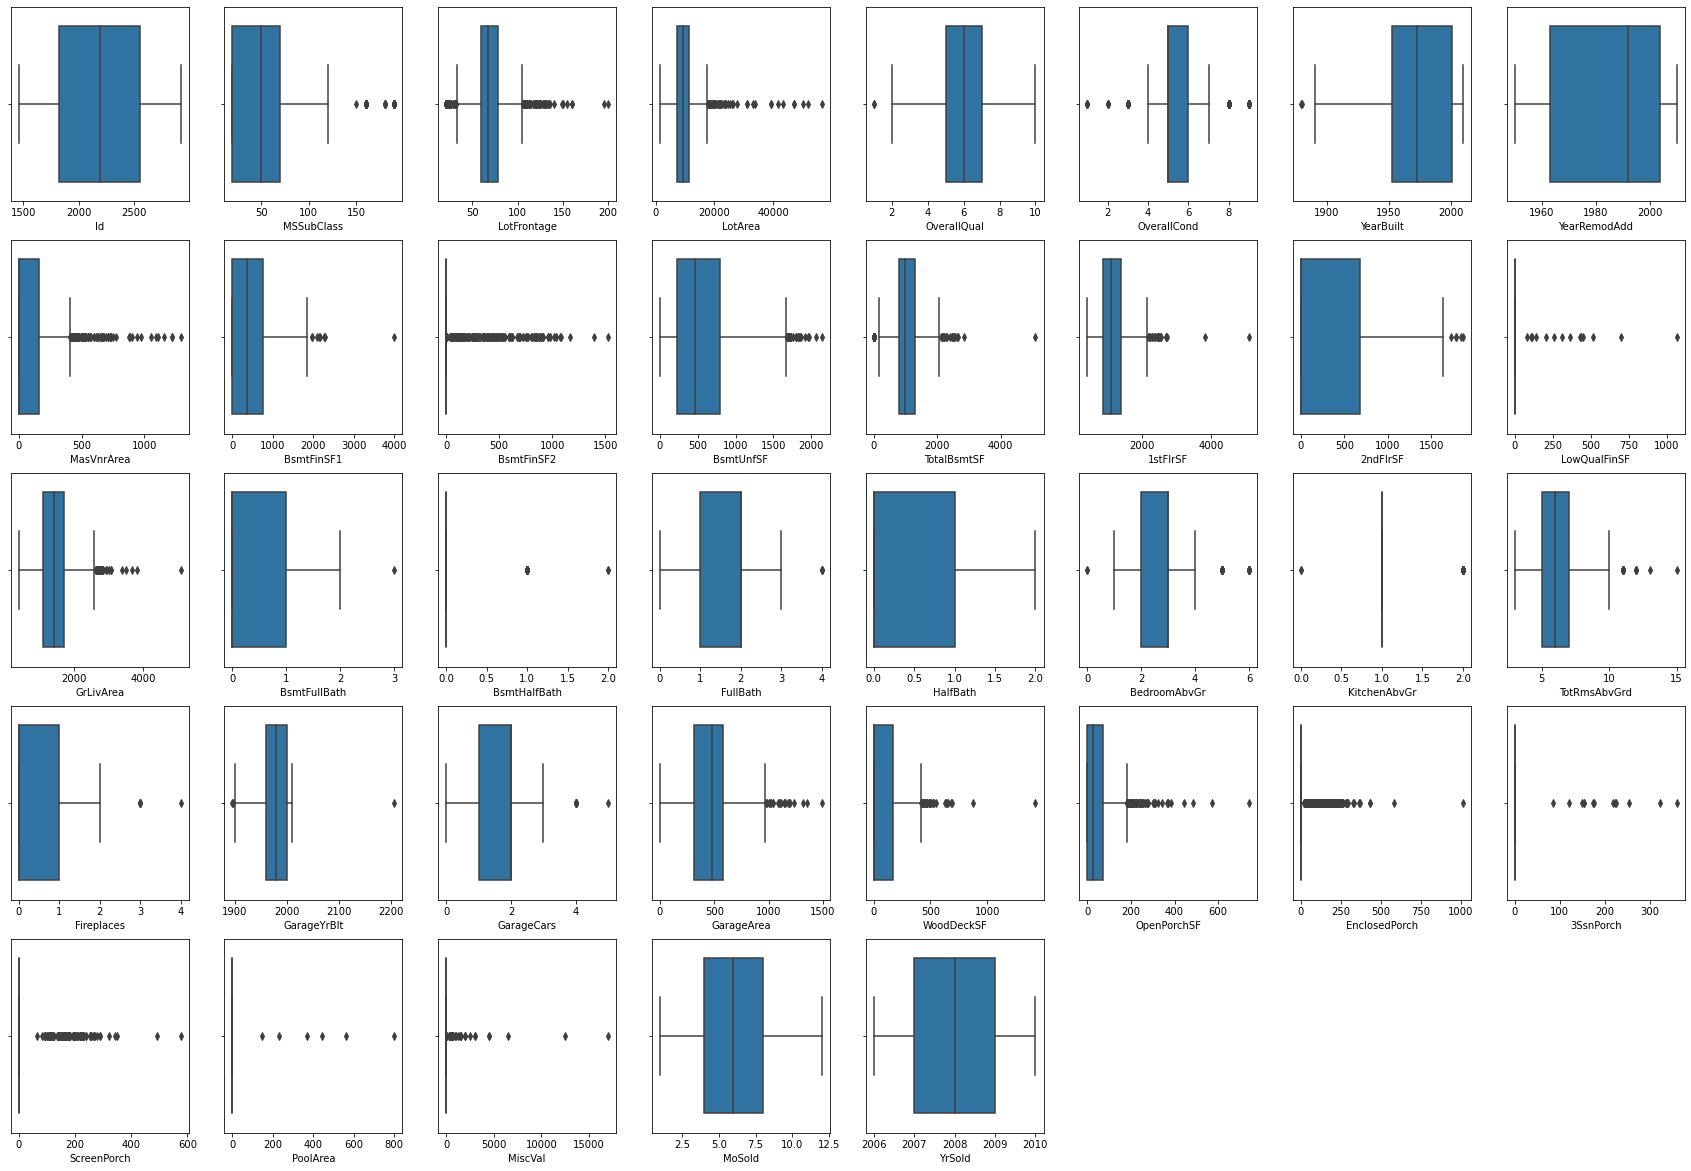

In [51]:
count=1
plt.subplots(figsize=(30,25))
for i in hs_test.columns:
    if hs_test[i].dtypes!='object':
        plt.subplot(6,8,count)
        sns.boxplot(x=hs_test[i])
        count+=1

plt.show()

In [52]:
# treatment of outlier-> 1.5 times the IQR 
# treat outlier as null
#<pre>
def out_to_null(data=hs_test):
    for x in hs_test.columns:
        if hs_test[x].dtypes ==np.float64:
            #In the given column the outliers will convert into null values
            print('\n\n Column name:', x)
            q1=data[x].quantile(0.25)
            print('Quatile, Q1: ',q1)
            q3=data[x].quantile(0.75)
            print('Quatile, Q3: ',q3)
            iqr=q3-q1
            print('Inter Quatile Range, IQR: ',iqr)
            ulp=q3+(1.5*iqr)
            print('Upper Limit Point, ULP: ',ulp)
            llp=q1-(1.5*iqr)
            print('Lower Limit Point, LLP: ',llp)
            print(np.where(ulp))
            #here the values which are above upperlimit and below lowerlimt are replaced with null values          
            data[x]=np.where(data[x] > ulp,np.nan,
                                   np.where(data[x] < llp,np.nan ,data[x]))
            print('\n\nin the given column the outliers are replaced with null values\n')

In [53]:
out_to_null(hs_test)



 Column name: LotFrontage
Quatile, Q1:  60.0
Quatile, Q3:  78.0
Inter Quatile Range, IQR:  18.0
Upper Limit Point, ULP:  105.0
Lower Limit Point, LLP:  33.0
(array([0]),)


in the given column the outliers are replaced with null values



 Column name: MasVnrArea
Quatile, Q1:  0.0
Quatile, Q3:  162.0
Inter Quatile Range, IQR:  162.0
Upper Limit Point, ULP:  405.0
Lower Limit Point, LLP:  -243.0
(array([0]),)


in the given column the outliers are replaced with null values



 Column name: BsmtFinSF1
Quatile, Q1:  0.0
Quatile, Q3:  752.0
Inter Quatile Range, IQR:  752.0
Upper Limit Point, ULP:  1880.0
Lower Limit Point, LLP:  -1128.0
(array([0]),)


in the given column the outliers are replaced with null values



 Column name: BsmtFinSF2
Quatile, Q1:  0.0
Quatile, Q3:  0.0
Inter Quatile Range, IQR:  0.0
Upper Limit Point, ULP:  0.0
Lower Limit Point, LLP:  0.0
(array([], dtype=int64),)


in the given column the outliers are replaced with null values



 Column name: BsmtUnfSF
Quatile

In [62]:
hs_test.isnull().sum().sum()

0

In [54]:
#fill null values with mean,median ,mode
for i in hs_test.columns:
    if hs_test[i].dtypes == 'object':
        hs_test[i].fillna(hs_test[i].mode()[0], inplace=True)
    else:
        hs_test[i].fillna(hs_test[i].median(), inplace=True)
hs_test.sample(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
1026,2487,60,RL,99.0,16779,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,Sawyer,Feedr,Norm,1Fam,2Story,5,4,1920,1996,Gable,CompShg,Wd Sdng,Wd Sdng,BrkFace,356.0,TA,Fa,CBlock,Gd,TA,No,BLQ,267.0,Unf,0.0,404.0,671.0,GasA,Fa,Y,SBrkr,1567,1087,0,2654,0.0,0.0,3,0,4,1,TA,11,Mod,1,Gd,Attchd,1946.0,Unf,2.0,638.0,TA,TA,Y,128,570,0,0,0,0,Ex,MnPrv,Shed,500,5,2007,WD,Normal
827,2288,20,RL,91.0,11825,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NridgHt,Norm,Norm,1Fam,1Story,8,5,2006,2007,Gable,CompShg,CemntBd,CmentBd,Stone,302.0,Gd,TA,PConc,Ex,TA,Mn,Unf,0.0,Unf,0.0,454.0,1694.0,GasA,Ex,Y,SBrkr,1694,0,0,1694,0.0,0.0,2,0,3,1,Gd,7,Typ,1,Gd,Attchd,2006.0,RFn,3.0,856.0,TA,TA,Y,0,112,0,0,0,0,Ex,MnPrv,Shed,0,6,2007,New,Partial
44,1505,20,FV,80.0,8000,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,1Story,7,5,2002,2002,Gable,CompShg,VinylSd,VinylSd,None,0.0,Gd,TA,PConc,Gd,TA,No,GLQ,833.0,Unf,0.0,659.0,1492.0,GasA,Ex,Y,SBrkr,1492,0,0,1492,1.0,0.0,2,0,3,1,Gd,6,Typ,1,Gd,Attchd,2002.0,RFn,2.0,596.0,TA,TA,Y,277,137,0,0,0,0,Ex,MnPrv,Shed,0,4,2010,WD,Normal
954,2415,90,RL,70.0,8078,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,Duplex,1Story,5,5,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,Stone,260.0,TA,TA,CBlock,TA,TA,No,Unf,0.0,Unf,0.0,1560.0,1560.0,GasA,TA,Y,SBrkr,1560,0,0,1560,0.0,0.0,2,0,4,2,TA,8,Typ,0,Gd,Detchd,1958.0,Unf,2.0,484.0,TA,TA,Y,0,0,0,0,0,0,Ex,MnPrv,Shed,0,12,2007,WD,Normal
137,1598,80,RL,85.0,19645,Pave,Grvl,IR1,Lvl,AllPub,FR2,Gtl,Crawfor,Norm,Norm,1Fam,SLvl,7,6,1994,2007,Gable,CompShg,VinylSd,VinylSd,BrkFace,44.0,TA,TA,PConc,Gd,TA,No,GLQ,343.0,Unf,0.0,80.0,423.0,GasA,Ex,Y,SBrkr,896,756,0,1652,1.0,0.0,2,1,3,1,Gd,6,Typ,0,Gd,BuiltIn,1994.0,RFn,2.0,473.0,TA,TA,Y,0,0,0,0,0,0,Ex,MnPrv,Shed,0,6,2010,WD,Normal
155,1616,160,RM,67.0,1900,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,TwnhsE,2Story,4,4,1970,1970,Gable,CompShg,CemntBd,CmentBd,None,0.0,TA,TA,CBlock,TA,TA,No,Unf,0.0,Unf,0.0,546.0,546.0,GasA,Ex,Y,SBrkr,546,546,0,1092,0.0,0.0,1,1,3,1,TA,5,Typ,0,Gd,Attchd,1979.0,Unf,0.0,0.0,TA,TA,Y,0,0,0,0,0,0,Ex,MnPrv,Shed,0,6,2010,WD,Normal
1098,2559,30,RL,54.0,7223,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,1Story,5,5,1926,1950,Hip,CompShg,Stucco,Plywood,None,0.0,TA,TA,PConc,TA,TA,Mn,BLQ,319.0,Unf,0.0,971.0,1290.0,GasA,TA,Y,SBrkr,1422,0,0,1422,0.0,0.0,1,0,3,1,TA,6,Typ,0,Gd,Detchd,1973.0,Unf,1.0,352.0,TA,TA,Y,0,0,64,0,0,0,Ex,MnPrv,Shed,0,4,2007,WD,Normal
111,1572,20,RL,75.0,9525,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,1Fam,1Story,5,7,1954,1998,Gable,CompShg,WdShing,Wd Shng,None,0.0,TA,TA,CBlock,TA,TA,Av,BLQ,954.0,Unf,0.0,218.0,1172.0,GasA,TA,Y,SBrkr,1172,0,0,1172,1.0,0.0,1,0,3,1,TA,5,Typ,0,Gd,Attchd,1954.0,Fin,1.0,366.0,TA,TA,Y,240,0,0,0,0,0,Ex,MnPrv,Shed,0,6,2010,WD,Normal
712,2173,20,RL,40.0,14330,Pave,Grvl,IR1,Lvl,AllPub,CulDSac,Gtl,CollgCr,Norm,Norm,1Fam,1Story,5,6,1975,2001,Gable,CompShg,Plywood,Wd Sdng,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,88.0,ALQ,0.0,180.0,864.0,GasA,TA,Y,SBrkr,1558,0,0,1558,1.0,0.0,2,0,2,1,TA,5,Min2,0,Gd,Attchd,1975.0,Fin,2.0,440.0,TA,TA,Y,140,0,239,0,227,0,Ex,MnPrv,Shed,0,8,2008,WD,Normal
372,1833,70,RM,57.0,6876,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,IDOTRR,Norm,Norm,1Fam,

In [55]:
#fill null values with mean,median ,mode
for i in hs_test.columns:
    if hs_test[i].dtypes == 'object':
        hs_test[i].fillna(hs_test[i].mode()[0], inplace=True)
    else:
       hs_test[i].fillna(hs_test[i].median(), inplace=True)
hs_test.sample(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
970,2431,20,RL,60.0,7200,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,3,1950,1950,Gable,CompShg,WdShing,Wd Shng,None,0.0,TA,TA,CBlock,TA,TA,No,LwQ,432.0,Unf,0.0,432.0,864.0,GasA,Fa,Y,FuseA,1238,0,0,1238,0.0,0.0,1,1,3,1,TA,6,Min2,1,TA,Attchd,1950.0,Unf,1.0,357.0,TA,TA,Y,0,171,0,0,0,0,Ex,MnPrv,Shed,0,11,2007,WD,Normal
54,1515,50,RL,68.0,9724,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1.5Fin,5,7,1952,2002,Gable,CompShg,MetalSd,MetalSd,BrkFace,265.0,Gd,TA,CBlock,TA,TA,No,LwQ,670.0,Unf,0.0,470.0,1140.0,GasA,Gd,Y,SBrkr,1929,532,0,2461,0.0,0.0,2,0,3,1,TA,7,Min2,2,Gd,Detchd,1994.0,Unf,2.0,400.0,TA,TA,Y,0,0,0,0,0,0,Ex,GdWo,Shed,0,3,2010,WD,Normal
713,2174,60,RL,67.0,10400,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2001,Gable,CompShg,VinylSd,VinylSd,BrkFace,227.0,Gd,TA,PConc,Gd,TA,No,Unf,0.0,Unf,0.0,1257.0,1257.0,GasA,Ex,Y,SBrkr,1290,871,0,2161,0.0,0.0,2,1,3,1,Gd,8,Typ,1,TA,Attchd,2001.0,RFn,2.0,570.0,TA,TA,Y,0,84,0,0,0,0,Ex,MnPrv,Shed,0,6,2008,WD,Normal
123,1584,60,RL,75.0,9375,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,1997,1997,Gable,CompShg,VinylSd,VinylSd,None,0.0,Gd,TA,PConc,Gd,TA,No,Unf,0.0,Unf,0.0,1040.0,1040.0,GasA,Ex,Y,SBrkr,1044,1054,0,2098,0.0,0.0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,1997.0,Fin,2.0,621.0,TA,TA,Y,331,38,0,0,0,0,Ex,MnPrv,Shed,0,4,2010,WD,Normal
939,2400,50,RL,51.0,3500,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,BrkSide,Feedr,Norm,1Fam,1.5Fin,3,5,1945,1950,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,TA,TA,No,LwQ,144.0,Unf,0.0,226.0,370.0,GasA,TA,N,FuseA,442,228,0,670,1.0,0.0,1,0,2,1,Fa,4,Typ,0,Gd,Attchd,1979.0,Unf,0.0,0.0,TA,TA,N,0,21,0,0,0,0,Ex,MnPrv,Shed,2000,7,2007,WD,Normal
50,1511,20,RL,90.0,9900,Pave,Grvl,Reg,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,5,1966,1966,Hip,CompShg,HdBoard,HdBoard,None,0.0,TA,TA,PConc,Gd,TA,No,BLQ,1059.0,Unf,0.0,150.0,1209.0,GasA,Gd,Y,SBrkr,1209,0,0,1209,1.0,0.0,1,0,3,1,TA,6,Typ,0,Gd,Attchd,1966.0,RFn,2.0,504.0,TA,TA,Y,0,0,120,0,0,0,Ex,MnPrv,Shed,0,4,2010,ConLD,Normal
41,1502,160,FV,67.0,2403,Pave,Grvl,IR1,Lvl,AllPub,FR2,Gtl,Somerst,Norm,Norm,TwnhsE,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,None,0.0,Gd,TA,PConc,Gd,TA,No,GLQ,244.0,Unf,0.0,286.0,530.0,GasA,Ex,Y,SBrkr,530,550,0,1080,0.0,0.0,2,1,2,1,Gd,4,Typ,0,Gd,Attchd,2003.0,RFn,2.0,496.0,TA,TA,Y,0,50,0,0,0,0,Ex,MnPrv,Shed,0,6,2010,WD,Normal
570,2031,120,FV,67.0,4538,Pave,Grvl,IR1,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,TwnhsE,1Story,9,5,2001,2001,Gable,CompShg,VinylSd,VinylSd,BrkFace,179.0,Gd,TA,PConc,Ex,TA,Av,GLQ,1004.0,Unf,0.0,306.0,1310.0,GasA,Ex,Y,SBrkr,1310,0,0,1310,1.0,0.0,1,1,1,1,Gd,5,Typ,1,TA,Attchd,2001.0,RFn,2.0,545.0,TA,TA,Y,277,45,0,0,0,0,Ex,MnPrv,Shed,0,7,2008,WD,Normal
17,1478,20,RL,90.0,11520,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NridgHt,PosN,Norm,1Fam,1Story,9,5,2005,2005,Hip,CompShg,VinylSd,VinylSd,BrkFace,0.0,Gd,TA,PConc,Ex,TA,No,GLQ,110.0,Unf,0.0,1588.0,1698.0,GasA,Ex,Y,SBrkr,1698,0,0,1698,0.0,0.0,2,0,3,1,Ex,7,Typ,1,Gd,Attchd,2005.0,Fin,3.0,730.0,TA,TA,Y,192,74,0,0,0,0,Ex,MnPrv,Shed,0,6,2010,WD,Normal
1393,2854,120,RM,37.0,4435,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm

In [56]:
hs_test.isnull().sum().sum()

0

In [57]:
hs_test = pd.get_dummies(hs_test, drop_first = True)
hs_test.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,Alley_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_TA,BsmtCond_Gd,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_GasW,Heating_Grav,Heating_Wall,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_Y,Electrical_FuseF,Electrical_FuseP,Electrical_SBrkr,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_Po,FireplaceQu_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Gd,GarageQual_Po,GarageQual_TA,GarageCond_Fa,GarageCond_Gd,GarageCond_Po,GarageCond_TA,PavedDrive_P,PavedDrive_Y,PoolQC_Gd,Fence_GdWo,Fence_MnPrv,Fence_MnWw,MiscFeature_Othr,MiscFeature_Shed,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1461,20,80.0,11622,5,6,1961,1961,0.0,468.0,0.0,270.0,882.0,896,0,0,896,0.0,0.0,1,0,2,1,5,0,1961.0,1.0,730.0,140,0,0,0,120,0,0,6,2010,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,0,0,0,0,0

In [58]:
hs_test.shape

(1459, 228)

In [59]:
X_test.shape

(292, 245)

In [60]:
X_train.shape

(876, 245)

In [63]:
X_test= hs_test.drop(columns=['Id'])

y_test_predicted = model_XGboost.predict(X_test)

hs_test['SalePrice'] = y_test_predicted

test_df

ValueError: Feature shape mismatch, expected: 245, got 227

In [95]:
hs_test.to_csv('test_fnl', index= False)

## *------------*
## Final Data
## *------------*

In [65]:
final_prdc =pd.concat([hs_train,hs_test],axis=0)

In [66]:
final_prdc.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,Alley_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_NoSeWa,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_TA,BsmtCond_Gd,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_Y,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_Po,FireplaceQu_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Fa,GarageQual_Gd,GarageQual_Po,GarageQual_TA,GarageCond_Fa,GarageCond_Gd,GarageCond_Po,GarageCond_TA,PavedDrive_P,PavedDrive_Y,PoolQC_Fa,PoolQC_Gd,Fence_GdWo,Fence_MnPrv,Fence_MnWw,MiscFeature_Othr,MiscFeature_Shed,MiscFeature_TenC,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1,60,65.0,8450,7,5,2003,2003,196.0,706.0,0.0,150.0,856.0,856,854,0,1710,1.0,0.0,2,1,3,1,8,0,2003.0,2.0,548.0,0,61,0,0,0,0,0,2,2008,208500.0,

In [67]:
final_prdc.shape

(2919, 247)

In [68]:
final_prdc.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,Alley_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_NoSeWa,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_TA,BsmtCond_Gd,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_Y,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_Po,FireplaceQu_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Fa,GarageQual_Gd,GarageQual_Po,GarageQual_TA,GarageCond_Fa,GarageCond_Gd,GarageCond_Po,GarageCond_TA,PavedDrive_P,PavedDrive_Y,PoolQC_Fa,PoolQC_Gd,Fence_GdWo,Fence_MnPrv,Fence_MnWw,MiscFeature_Othr,MiscFeature_Shed,MiscFeature_TenC,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
count,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919

In [69]:
final_prdc.isnull().sum().sum()

27721

In [70]:
#fill null values with mean,median ,mode
for i in final_prdc.columns:
    if final_prdc[i].dtypes == 'object':
        final_prdc[i].fillna(final_prdc[i].mode()[0], inplace=True)
    else:
        final_prdc[i].fillna(final_prdc[i].median(), inplace=True)
final_prdc.sample(10)

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,Alley_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_NoSeWa,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_TA,BsmtCond_Gd,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_Y,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_Po,FireplaceQu_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Fa,GarageQual_Gd,GarageQual_Po,GarageQual_TA,GarageCond_Fa,GarageCond_Gd,GarageCond_Po,GarageCond_TA,PavedDrive_P,PavedDrive_Y,PoolQC_Fa,PoolQC_Gd,Fence_GdWo,Fence_MnPrv,Fence_MnWw,MiscFeature_Othr,MiscFeature_Shed,MiscFeature_TenC,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
857,2318,60,72.0,8229,6,5,2007,2007,22.0,0.0,0.0,752.0,752.0,752,752,0,1504,0.0,0.0,2,1,3,1,6,0,2007.0,2.0,440.0,100,32,0,0,0,0,0,12,2007,1630

In [71]:
final_prdc.isnull().sum().sum()

0

In [72]:
X = final_prdc.drop(["SalePrice"], axis=1)
y = final_prdc["SalePrice"]

In [73]:
X.shape

(2919, 246)

In [74]:
y.shape

(2919,)

In [75]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=42)
# 0.20 menas testing data is 20 % and 80 % training
# random satate for to select data randomly into training and testing part

In [76]:
print(X_train.shape)
print(y_train.shape)

(2189, 246)
(2189,)


In [77]:
print(X_test.shape)
print(y_test.shape)

(730, 246)
(730,)


In [78]:
y.head()

0    208500.0
1    181500.0
2    223500.0
3    140000.0
4    250000.0
Name: SalePrice, dtype: float64

## * Linear Regression

In [79]:
from sklearn.linear_model import LinearRegression

In [80]:
lr = LinearRegression()

In [81]:
lr.fit(X_train, y_train)

LinearRegression()

In [82]:
y_predict = lr.predict(X_test)

In [83]:
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_predict)
print('Linear Regression MSE:', mse)

Linear Regression MSE: 1850959560.6247


In [84]:
from sklearn import metrics

# make prediction with the fitted model
linear_pred = lr.predict(X_test) 

# score the model on the train set
print('Train score: {}\n'.format(lr.score(X_train,y_train)))

# score the model on the test set
print('Test  score: {}\n'.format(lr.score(X_test,y_test)))

# calculate the overall accuracy of the model
print('Overall model accuracy: {}\n'.format(r2_score(y_test,linear_pred)))

# compute the mean squared error of the model
print('Mean Squared Error: {}\n'.format(mean_squared_error(y_test,linear_pred)))

# compute the mean absolute error of the model
print('Mean Absolute Error: {}'.format(metrics.mean_absolute_error(y_test,y_predict)))

Train score: 0.5469544292033421

Test  score: 0.46825719751615547

Overall model accuracy: 0.46825719751615547

Mean Squared Error: 1850959560.6247

Mean Absolute Error: 31339.594027430696


In [85]:
# *Decision Tree Regression

In [86]:
from sklearn.tree import DecisionTreeRegressor
dr = DecisionTreeRegressor()

dr.fit(X_train, y_train)

y_pred = dr.predict(X_test)

from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.5027397260273972

In [87]:
dr.fit(X_train, y_train)

DecisionTreeRegressor()

In [88]:
y_pred = dr.predict(X_test)

In [89]:
from sklearn.metrics import accuracy_score

In [90]:
accuracy_score(y_test, y_pred)

0.5013698630136987

## *Random Forest

In [91]:
from sklearn.ensemble import RandomForestRegressor

In [92]:
rr = RandomForestRegressor()
rr.fit(X_train, y_train)

RandomForestRegressor()

In [93]:
#prediction on test dataset

y_pred = rr.predict(X_test)

In [109]:
#calculate accuracy
from sklearn.metrics import accuracy_score
accuracy_score(y_pred, y_test)

ValueError: Classification metrics can't handle a mix of continuous and multiclass targets

In [104]:
Regression.coef_     # B1 value 

AttributeError: 'RandomForestRegressor' object has no attribute 'coef_'

In [98]:
from sklearn import tree

In [99]:
def train_models(X_train, y_train):
    tree = DecisionTreeRegressor(max_features=75,max_depth=4, random_state = 0)
    tree.fit(X_train, y_train)
    y_pred_tree = tree.predict(X_test),
    
    rf = RandomForestRegressor(n_estimators = 100,max_features =75, random_state = 0)
    rf.fit(X_train, y_train)
    y_pred_rf= rf.predict(X_test),
    
    svr= SVR(kernel = 'rbf')
    svr.fit(X_train, y_train)
    y_pred_svr = svr.predict(X_test),
    
    svr_l= SVR(kernel = 'linear')
    svr_l.fit(X_train, y_train)
    y_pred_svr_linear = svr_l.predict(X_test),
    
    knn = neighbors.KNeighborsRegressor()
    knn.fit(X_train, y_train)
    y_pred_knn = knn.predict(X_test),
    
    meanAbErr_tree= metrics.mean_absolute_error(y_test, y_pred_tree)
    meanSqErr_tree= metrics.mean_squared_error(y_test, y_pred_tree)
    rootMeanSqErr_tree= np.sqrt(metrics.mean_squared_error(y_test, y_pred_tree)),
    
    meanAbErr_rf= metrics.mean_absolute_error(y_test, y_pred_rf)
    meanSqErr_rf= metrics.mean_squared_error(y_test, y_pred_rf)
    rootMeanSqErr_rf= np.sqrt(metrics.mean_squared_error(y_test, y_pred_rf)),
    
    meanAbErr_knn = metrics.mean_absolute_error(y_test, y_pred_knn)
    meanSqErr_knn = metrics.mean_squared_error(y_test, y_pred_knn)
    rootMeanSqErr_knn= np.sqrt(metrics.mean_squared_error(y_test, y_pred_knn)),
    
    meanAbErr_svr = metrics.mean_absolute_error(y_test, y_pred_svr_linear)
    meanSqErr_svr = metrics.mean_squared_error(y_test, y_pred_svr_linear)
    rootMeanSqErr_svr= np.sqrt(metrics.mean_squared_error(y_test, y_pred_svr_linear))
    

In [100]:
print('[1]Decision Tree Training Accurancy: ', r2_score(y_test,y_pred_tree))
print('Mean Absolute Error:', meanAbErr_tree)
print('Mean Square Error:', meanSqErr_tree)
print('Root Mean Square Error:', rootMeanSqErr_tree)
print('\\t')
print('[2]RandomForestRegressor Training Accurancy: ',r2_score(y_test,y_pred_rf))
print('Mean Absolute Error:', meanAbErr_rf)
print('Mean Square Error:', meanSqErr_rf)
print('Root Mean Square Error:', rootMeanSqErr_rf)
print('\\t')
print('[3]SupportvectorRegression Accuracy(rbf): ', r2_score(y_test,y_pred_svr))
print('\\t')
print('[4]SupportvectorRegression Accuracy(linear): ', r2_score(y_test,y_pred_svr_linear))
print('Mean Absolute Error:', meanAbErr_svr)
print('Mean Square Error:', meanSqErr_svr)
print('Root Mean Square Error:', rootMeanSqErr_svr)
print('\\t')
print('[5]knn Training Accurancy: ', r2_score(y_test,y_pred_knn))
print('Mean Absolute Error:', meanAbErr_knn)
print('Mean Square Error:', meanSqErr_knn)
print('Root Mean Square Error:', rootMeanSqErr_knn)
print('\\t')

NameError: name 'y_pred_tree' is not defined